In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt

In [9]:
# 均值滤波
def MeanFilter(inputImage,windowSize=3):
    timeBegin = cv.getTickCount()
    #输出图像
    outputImage = np.zeros(list(inputImage.shape),dtype='uint8')

    #获取图像信息
    height, width, channels = inputImage.shape
    center = windowSize // 2  # 将滤波器分为widowSize * windowSize个小方格，中心点为center，坐标为(0, 0)

    #零填充
    border = center#添加边界大小
    transImage = cv.copyMakeBorder(inputImage,border,border,border,border,borderType=cv.BORDER_REPLICATE)
    
    # 卷积的过程
    for i in range(height):
        for j in range(width):
            for k in range(channels):
                outputImage[i,j,k] = np.mean(transImage[i:i+windowSize,j:j+windowSize,k])
    
    timeEnd = cv.getTickCount()
    time = (timeEnd-timeBegin)/cv.getTickFrequency()
    print("Time of the MeanFilter is : ",time)
    return outputImage

In [10]:
#积分图
def getIntegral(inputImage):
    img_integral = cv.integral(inputImage, cv.CV_32F)
    
    return img_integral



In [11]:
def integralFilter(inputImage,windowSize=3):
    timeBegin = cv.getTickCount()
    #输出图像
    outputImage = np.zeros(list(inputImage.shape),dtype='uint8')

    #获取图像信息
    height, width, channels = inputImage.shape
    center = windowSize // 2  # 将滤波器分为widowSize * windowSize个小方格，中心点为center，坐标为(0, 0)

    #零填充
    border = center#添加边界大小
    transImage = cv.copyMakeBorder(inputImage,border,border,border,border,borderType=cv.BORDER_REPLICATE)

    #积分图
    inte = getIntegral(transImage)

    #积分图均值滤波
    mean= 0
    for i in range(border+1,height + border + 1):#积分图图像比原图（边界扩充后的）多一行和一列
        for j in range(border+1,border+width+1):
            for k in range(channels):
                #像素点周围四点像素
                top_left = inte[i - border - 1, j - border-1,k]
                top_right = inte[i-border-1,j+border,k]
                buttom_left = inte[i + border, j - border- 1,k]
                buttom_right = inte[i+border,j+border,k]
                #计算像素
                mean = (buttom_right - top_right - buttom_left + top_left) // (windowSize ** 2)
                outputImage[i - border - 1, j - border - 1,k] = mean
                
    timeEnd = cv.getTickCount()
    time = (timeEnd-timeBegin)/cv.getTickFrequency()
    print("Time of the integralFilter is : ",time)
    return outputImage


In [12]:
#方框滤波
def BoxFilter(inputImage,windowSize = 3):
    timeBegin = cv.getTickCount()
    #输出图像
    outputImage = cv.boxFilter(inputImage,-1 ,(windowSize,windowSize), normalize=False)
    timeEnd = cv.getTickCount()
    time = (timeEnd-timeBegin)/cv.getTickFrequency()
    print("Time of the boxFilter is : ",time)
    return outputImage

In [13]:
#封装均值滤波
def Blur(inputImage,windowSize = 3):
    timeBegin = cv.getTickCount()
    #输出图像
    outputImage = cv.blur(inputImage,(windowSize,windowSize))
    timeEnd = cv.getTickCount()
    time = (timeEnd-timeBegin)/cv.getTickFrequency()
    print("Time of the Blur is : ",time)
    return outputImage



Time of the Blur is :  0.0064664
Time of the MeanFilter is :  23.2101667
Time of the integralFilter is :  6.0558728
Time of the boxFilter is :  0.0085092


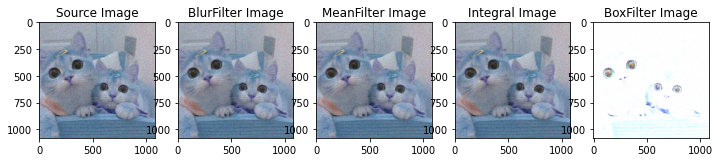

In [14]:
if __name__ == "__main__":
    # 读取图像
    img_src = cv.imread("noise_sp.png")

    #封装均值滤波
    blur_img = Blur(img_src,windowSize=5)
    cv.imwrite("blur_filter.png",blur_img)

    # 均值滤波
    mean_filter_img = MeanFilter(img_src,windowSize=5)
    cv.imwrite("mean_filter.png",mean_filter_img)

    #积分图均值滤波
    integral_img = integralFilter(img_src,windowSize=5)
    cv.imwrite("integral_filter.png",integral_img)

    #boxFilter滤波
    box_filter_img = BoxFilter(img_src,windowSize=2)
    cv.imwrite("box_filter.png",box_filter_img)
    
    #显示图像
    titles = ["Source Image","BlurFilter Image","MeanFilter Image","Integral Image","BoxFilter Image"]
    images = [img_src,blur_img,mean_filter_img,integral_img,box_filter_img]
    plt.figure(figsize = (12,9))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
    plt.show()
    

    